# IMPORT all your tools

In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# 2. Load Model

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

/home/leolebg/.local/lib/python3.10/site-packages/torch/hub.py:267: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /home/leolebg/.cache/torch/hub/master.zip
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.16.0-unknown is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_re

  0%|          | 0.00/14.1M [00:00<?, ?B/s]


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


# YOU CAN !
# 3. Make Detections with simple Images

In [3]:
img = './salon.jpg'

In [4]:
results = model(img)
results.print()

image 1/1: 630x1200 2 chairs, 1 couch, 3 potted plants, 1 dining table, 1 clock, 6 vases
Speed: 11.0ms pre-process, 732.1ms inference, 1.8ms NMS per image at shape (1, 3, 352, 640)


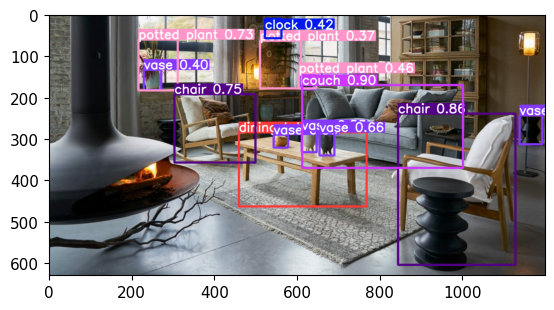

In [5]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

# AND YOU CAN ALSO




# 4. MAKE Real Time Detections

In [7]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    # Make detections
    results = model(frame)
    cv2.imshow('POC Project', np.squeeze(results.render()))
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()